# PCA

PCA(Principal Component Analysis)는 주성분 분석이라고도 하며 차원 축소를 통해 최소 차원의 정보로 원래 차원의 정보를 모사(approximate)하려는 작업을 말한다.

## 차원 축소

차원 축소란(Dimension Reduction) 고차원 벡터에서 일부 차원의 값을 모두 0으로 만들어(truncation) 저차원 벡터로 줄이는 것을 말한다.

다만 원래의 고차원 벡터의 특성을 최대한 살리기 위해 가장 분산이 높은 방향으로 회전 변환(rotation transform)을 한다.

<img src="https://alliance.seas.upenn.edu/~cis520/dynamic/2014/wiki/uploads/Lectures/pca-example-1D-of-2D_small.png" style="width:40%; margin: 0 auto 0 auto;">


<img src="http://www.nlpca.org/fig_pca_principal_component_analysis.png" style="width:90%; margin: 0 auto 0 auto;">

Scikit-Learn 의 decomposition 서브패키지는 PCA분석을 위한 `PCA` 클래스를 제공한다. 사용법은 다음과 같다.


* 입력 인수:	
  * n_components : 정수
    * 최종 성분의 수


* 속성:	
 * `components_`
    * 주성분 축
 * `n_components_` 
    * 주성분의 수
 * `mean_` :
    * 각 성분의 평균
 * `explained_variance_ratio_` 
    * 각 성분의 분산 비율


## 2차원 PCA의 예

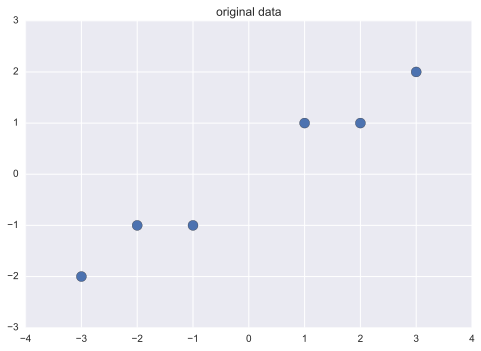

In [21]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.show()

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [13]:
Z = pca.transform(X)
Z

array([[-1.38340578,  0.2935787 ],
       [-2.22189802, -0.25133484],
       [-3.6053038 ,  0.04224385],
       [ 1.38340578, -0.2935787 ],
       [ 2.22189802,  0.25133484],
       [ 3.6053038 , -0.04224385]])

In [10]:
w, V = np.linalg.eig(pca.get_covariance())

In [14]:
V.T.dot(X.T).T

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

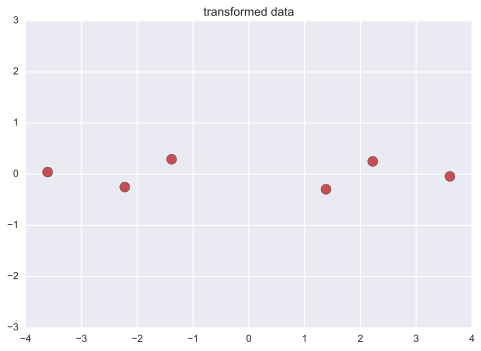

In [22]:
plt.scatter(Z[:,0], Z[:,1], c='r', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed data")
plt.show()

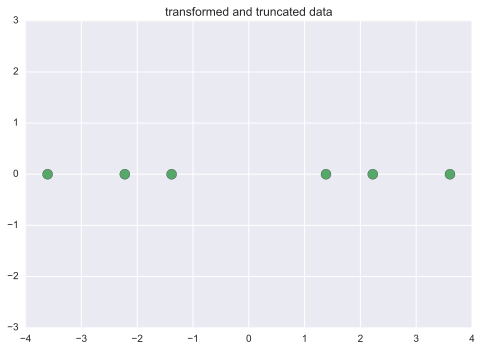

In [23]:
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data")
plt.show()

## IRIS 데이터의 예

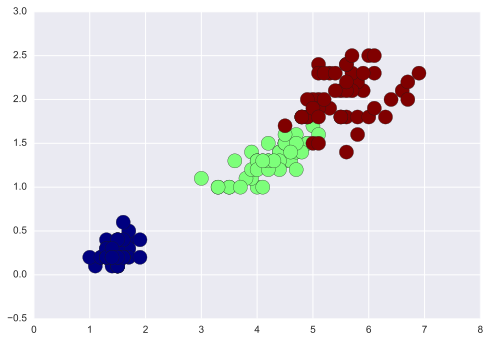

In [57]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,2:]
plt.scatter(X[:, 0], X[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

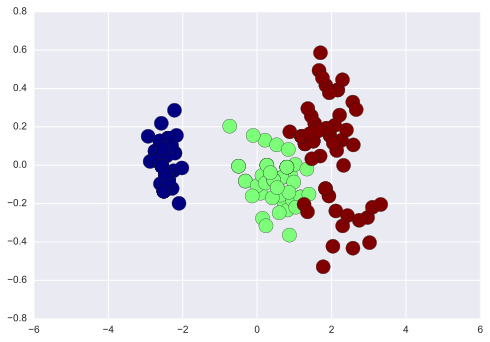

In [58]:
X2 = PCA(2).fit_transform(X)
plt.scatter(X2[:, 0], X2[:, 1], c=iris.target, s=200, cmap=plt.cm.jet)
plt.xlim(-6, 6)
plt.show()

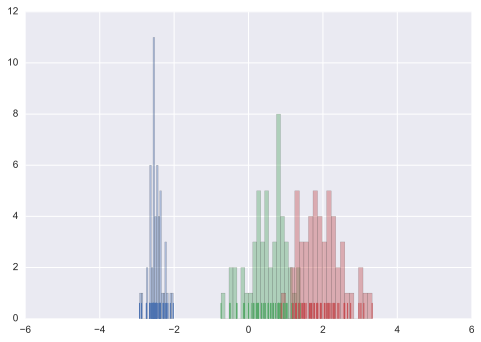

In [52]:
X1 = PCA(1).fit_transform(X)
sns.distplot(X1[iris.target==0], color="b", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==1], color="g", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==2], color="r", bins=20, rug=True, kde=False)
plt.xlim(-6, 6)
plt.show()

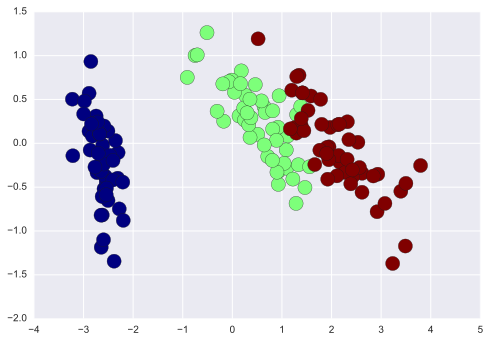

In [53]:
X3 = PCA(2).fit_transform(iris.data)
plt.scatter(X3[:, 0], X3[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

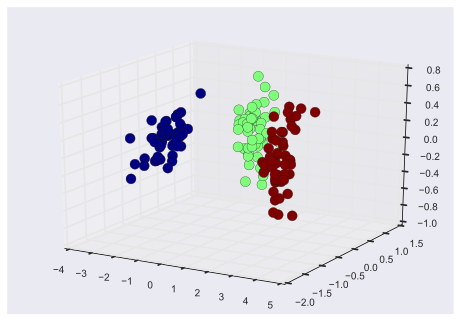

In [54]:
X4 = PCA(3).fit_transform(iris.data)
from mpl_toolkits.mplot3d import Axes3D

def plot_pca(azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(X4[:,0], X4[:,1], X4[:,2], c=iris.target, s=100, cmap=plt.cm.jet, alpha=1);
    ax.view_init(20, azim)

plot_pca(-60)

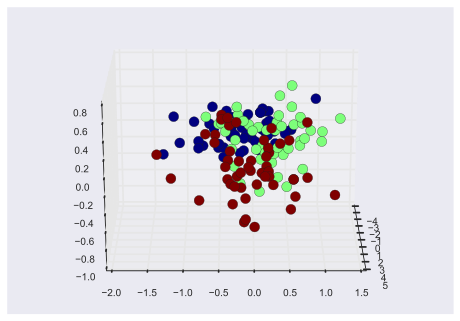

In [55]:
from ipywidgets import widgets
widgets.interact(plot_pca, azim=widgets.IntSlider(min=0, max=180, step=10, value=0));

## 이미지 PCA

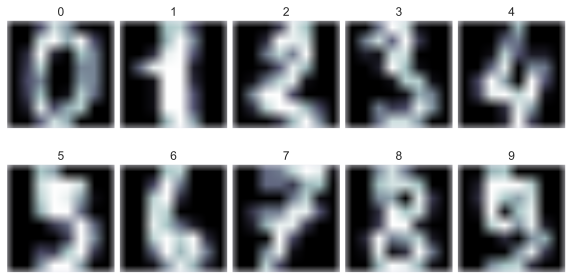

In [63]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

N=2; M=5;
fig = plt.figure(figsize=(10, 4))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_digits)
print(X_digits.shape)
print(X_pca.shape)

(1797, 64)
(1797, 10)


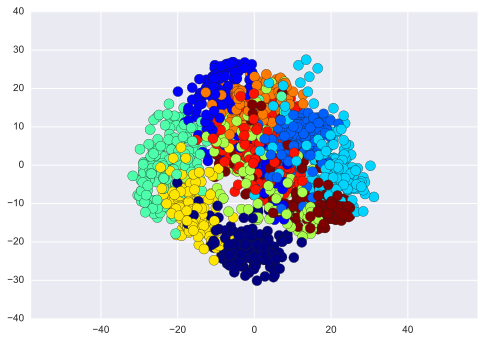

In [66]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_digits, s=100, cmap=plt.cm.jet)
plt.axis("equal")
plt.show()

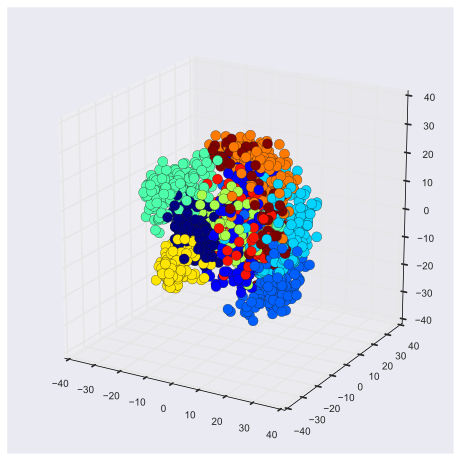

In [67]:
from mpl_toolkits.mplot3d import Axes3D

def plot_pca2(azim):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_digits, s=100, cmap=plt.cm.jet, alpha=1);
    ax.view_init(20, azim)

plot_pca2(-60)

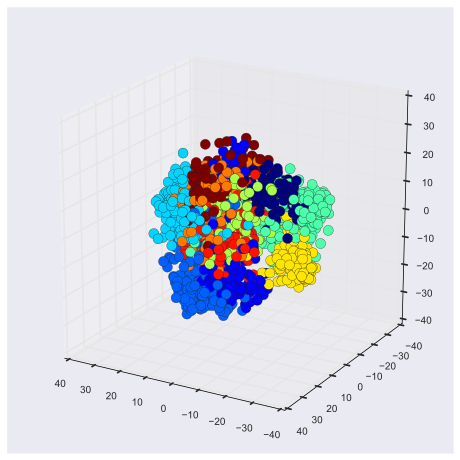

In [68]:
from ipywidgets import widgets
widgets.interact(plot_pca2, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

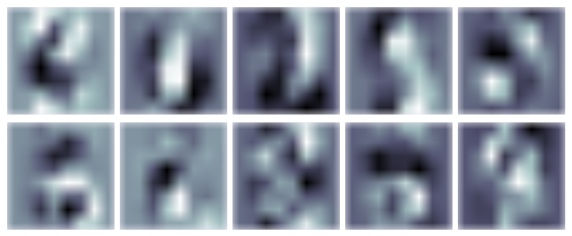

In [75]:
N=2; M=5;
fig = plt.figure(figsize=(10,3.2))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        p = fig.add_subplot(N, M, k+1)
        p.imshow(pca.components_[k].reshape((8,8)), cmap=plt.cm.bone, interpolation='none')
        plt.xticks([])
        plt.yticks([])    
        plt.grid(False)

## Kernal PCA

데이터의 분리성을 향상시키기 위해 비선형 변환 $\phi(x)$ 을 한 데이터에 대해서 다시 PCA 적용하는 방법을 Kernel PCA라고 한다.

$$ x \;\; \rightarrow \;\; \phi(x) \;\; \rightarrow \;\; \text{PCA} \;\; \rightarrow \;\; z $$

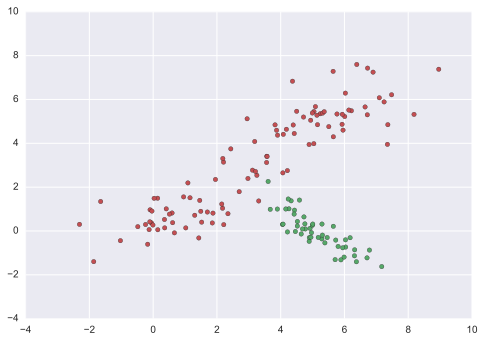

In [114]:
A1_mean = [1, 1]
A1_cov = [[2, 1], [1, 1]]
A1 = np.random.multivariate_normal(A1_mean, A1_cov, 50)
A2_mean = [5, 5]
A2_cov = [[2, 1], [1, 1]]
A2 = np.random.multivariate_normal(A2_mean, A2_cov, 50)
A = np.vstack([A1, A2])
B_mean = [5, 0]
B_cov = [[0.8, -0.7], [-0.7, 0.8]]
B = np.random.multivariate_normal(B_mean, B_cov, 50)
AB = np.vstack([A, B])

plt.scatter(A[:,0], A[:,1], c='r')
plt.scatter(B[:,0], B[:,1], c='g')
plt.show()

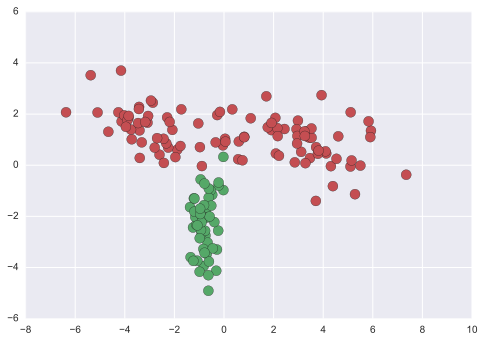

In [127]:
pca = PCA(n_components=2)
pca.fit(AB)
A_transformed = pca.transform(A)
B_transformed = pca.transform(B)
plt.scatter(A_transformed[:,0], A_transformed[:,1], c="r", s=100)
plt.scatter(B_transformed[:,0], B_transformed[:,1], c="g", s=100)
plt.show()

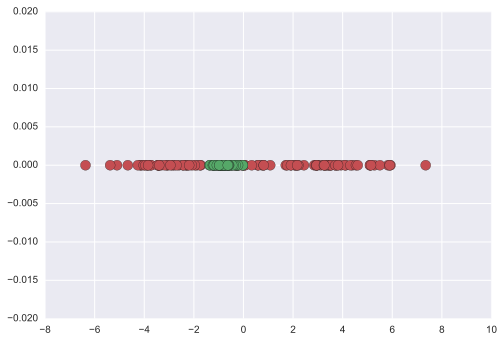

In [119]:
pca = PCA(n_components=1)
pca.fit(AB)
A_transformed = pca.transform(A)
B_transformed = pca.transform(B)
plt.scatter(A_transformed, np.zeros(len(A_transformed)), c="r", s=100)
plt.scatter(B_transformed, np.zeros(len(B_transformed)), c="g", s=100)
plt.show()

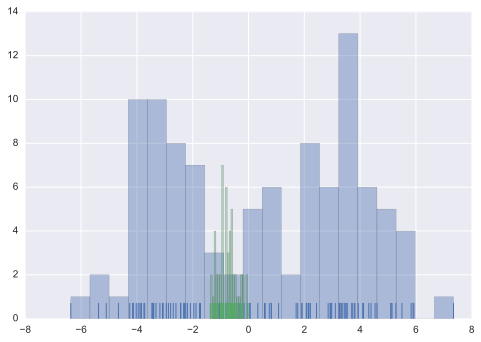

In [120]:
sns.distplot(A_transformed, color="b", bins=20, rug=True, kde=False)
sns.distplot(B_transformed, color="g", bins=20, rug=True, kde=False)
plt.show()

In [ ]:
from sklearn.decomposition import KernelPCA

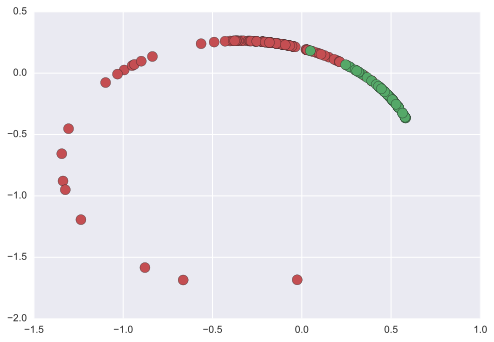

In [128]:
kpca = KernelPCA(kernel="cosine", n_components=2)
kpca.fit(AB)
A_transformed2 = kpca.transform(A)
B_transformed2 = kpca.transform(B)
plt.scatter(A_transformed2[:,0], A_transformed2[:,1], c="r", s=100)
plt.scatter(B_transformed2[:,0], B_transformed2[:,1], c="g", s=100)
plt.show()

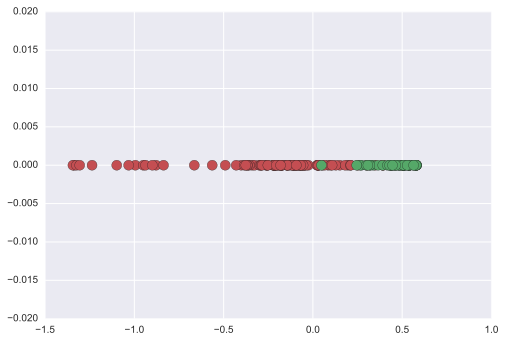

In [123]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="cosine", n_components=1)
kpca.fit(AB)
A_transformed2 = kpca.transform(A)
B_transformed2 = kpca.transform(B)
plt.scatter(A_transformed2, np.zeros(len(A_transformed2)), c="r", s=100)
plt.scatter(B_transformed2, np.zeros(len(B_transformed2)), c="g", s=100)
plt.show()

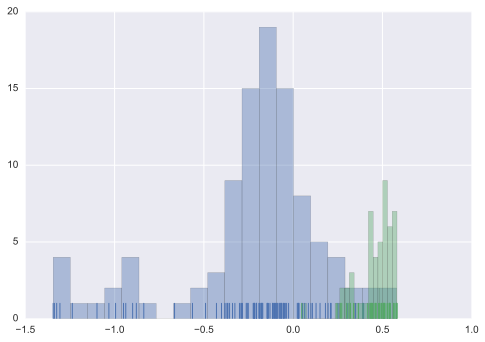

In [124]:
sns.distplot(A_transformed2, color="b", bins=20, rug=True, kde=False)
sns.distplot(B_transformed2, color="g", bins=20, rug=True, kde=False)
plt.show()

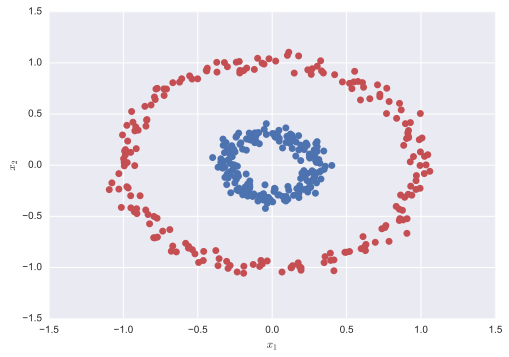

In [131]:
from sklearn.datasets import make_circles
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
reds = y == 0
blues = y == 1
plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

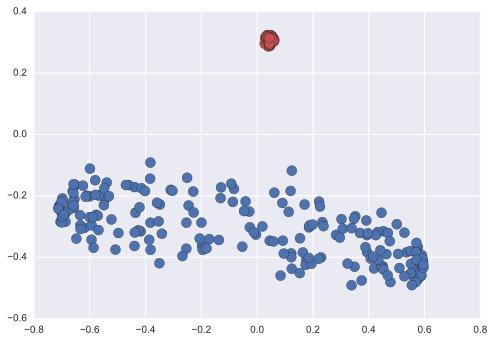

In [147]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
kpca.fit(X)
A_transformed2 = kpca.transform(X[reds])
B_transformed2 = kpca.transform(X[blues])
plt.scatter(A_transformed2[:,0], A_transformed2[:,1], c="r", s=100)
plt.scatter(B_transformed2[:,0], B_transformed2[:,1], c="b", s=100)
plt.show()

## 성분 수의 결정

성분의 수가 같은 PCA로 변환된 데이터의 공분산 행렬의 고유값은 원래 데이터의 공분산 행렬의 고유값과 일치한다.
성분의 수를 줄여야 하는 경우에는 가장 고유값이 작은 성분부터 생략한다.


* 원래의  데이터 $X$의 공분산 행렬 $X^TX$의 고유값
 $$ \lambda_1, \lambda_2, \lambda_3, \cdots, \lambda_D $$


* PCA 변환한   데이터 $Z$의 공분산 행렬 $Z^TZ$의 고유값
 $$ \lambda_1,  \cdots, \lambda_L $$


* Explained Variance 
$$ \dfrac{\lambda_1 +  \cdots + \lambda_L}{\lambda_1 + \lambda_2 + \lambda_3 + \cdots + \lambda_D} < 1$$

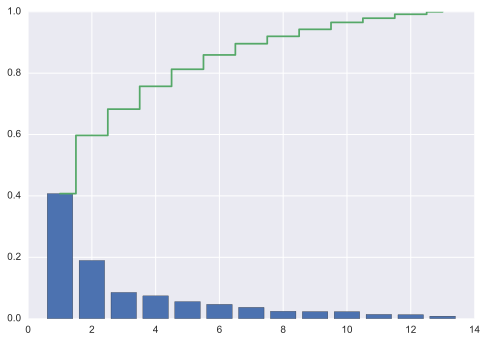

In [152]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

wine = fetch_mldata("wine")
X, y = wine.data, wine.target

pca = PCA().fit(X)
var = pca.explained_variance_
cmap = sns.color_palette()
plt.bar(np.arange(1,len(var)+1), var/np.sum(var), align="center", color=cmap[0])
plt.step(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), where="mid", color=cmap[1])
plt.show()

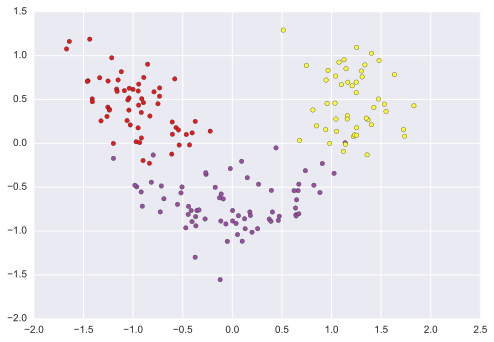

In [160]:
X_pca = PCA(2).fit_transform(X)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set1"))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap)
plt.show()

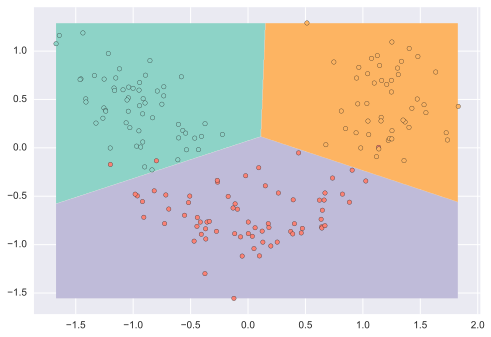

In [166]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_pca, y)

xmin, xmax = X_pca[:,0].min(), X_pca[:,0].max()
ymin, ymax = X_pca[:,1].min(), X_pca[:,1].max()
XGrid, YGrid = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZGrid = np.reshape(clf.predict(np.array([XGrid.ravel(), YGrid.ravel()]).T), XGrid.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XGrid, YGrid, ZGrid, cmap=cmap)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap)
plt.show()

## 파이프라인

In [109]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

model1 = linear_model.LogisticRegression()
model1.fit(X_digits, y_digits)

pca = decomposition.PCA()
logistic = linear_model.LogisticRegression()
model2 = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
model2.fit(X_digits, y_digits)

Pipeline(steps=[('pca', PCA(copy=True, n_components=None, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_digits, model1.predict(X_digits)))
print(classification_report(y_digits, model2.predict(X_digits)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.97      0.98      0.98       182
          2       1.00      1.00      1.00       177
          3       0.98      1.00      0.99       183
          4       1.00      1.00      1.00       181
          5       1.00      1.00      1.00       182
          6       1.00      1.00      1.00       181
          7       1.00      1.00      1.00       179
          8       0.98      0.97      0.97       174
          9       1.00      0.98      0.99       180

avg / total       0.99      0.99      0.99      1797

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.97      1.00      0.98       182
          2       0.99      1.00      1.00       177
          3       0.99      0.99      0.99       183
          4       0.99      0.99      0.99       181
          5       0.99      0.99      0.99